In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import datetime as dt

In [3]:
penguin_data = pd.read_csv('/Users/annapuzinovici/Desktop/Seneca/Course 2 Intro to Data Modelling/Week 4/penguins_lter.csv')

# Notes
Datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.



Columns in the dataset¶

studyName: Sampling expedition from which data were collected, generated, etc.
Sample Number: Continuous numbering sequence for each sample
Species: penguin species (Chinstrap, Adélie, or Gentoo)
Region: Nominal region of Palmer LTER sampling grid
Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
Stage: Reproductive stage at sampling
Individual ID: A unique ID for each individual in dataset
Clutch Completion: Was the study nest observed with a full clutch, i.e., 2 eggs 
Date Egg: Date study nest observed with 1 egg (sampled)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
Sex: penguin sex
Delta 15 N: a measure of the ratio of stable isotopes 15N:14N
Delta 13 C: a measure of the ratio of stable isotopes 13C:12C
Comments: Text field to provide additional relevant information for data


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.



Note: we didn't look at how to handle large text fields like comments, so you can drop this column, or you are welcome to use google to see how it can be incorporated into the analysis.

More info about the dataset
License & citation

Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.
Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [4]:
print(penguin_data.columns.tolist())

['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments']


In [29]:
penguin_data_removed = penguin_data.drop(axis=1, columns=['Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Comments']),

KeyError: "['Region', 'Individual ID', 'Clutch Completion', 'Date Egg'] not found in axis"

In [ ]:
penguin_data = penguin_data_removed 

In [ ]:
penguin_data.info()

In [ ]:
penguin_data.nunique()

In [30]:
type(penguin_data.nunique())

pandas.core.series.Series

In [31]:
penguin_data.nunique().sort_values(ascending=True)

Stage                    1
studyName                3
Species                  3
Island                   3
Sex                      3
Comments                 7
Flipper Length (mm)     55
Culmen Depth (mm)       80
Body Mass (g)           94
Sample Number          152
Culmen Length (mm)     164
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
dtype: int64

In [46]:
#convert columns to categorical/numerical 
columns_to_convert_to_cat = penguin_data.nunique()[penguin_data.nunique()<= 112].index

categorical_columns = ['studyName', 'Species', 'Sex']

numerical_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

In [47]:
#double check that the number in each column is correct 
len(categorical_columns)

3

In [48]:
len(numerical_columns)

4

In [49]:
# convert categorical columns to categories
for col in categorical_columns:
    penguin_data[col] = penguin_data[col].astype('category',copy=False)

In [50]:
for col in numerical_columns:
    penguin_data[col] = penguin_data[col].astype('float64',copy=False)

In [51]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   studyName            344 non-null    category
 1   Sample Number        344 non-null    float64 
 2   Species              344 non-null    category
 3   Island               344 non-null    object  
 4   Stage                344 non-null    object  
 5   Culmen Length (mm)   342 non-null    float64 
 6   Culmen Depth (mm)    342 non-null    float64 
 7   Flipper Length (mm)  342 non-null    float64 
 8   Body Mass (g)        342 non-null    float64 
 9   Sex                  334 non-null    category
 10  Delta 15 N (o/oo)    330 non-null    float64 
 11  Delta 13 C (o/oo)    331 non-null    float64 
 12  Comments             26 non-null     object  
dtypes: category(3), float64(7), object(3)
memory usage: 28.4+ KB


# Running Statistics

In [52]:
#run statistics for numerical columns 
penguin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),342.0,43.921930,5.459584,32.10000,39.225000,44.450000,48.500000,59.60000
Culmen Depth (mm),342.0,17.151170,1.974793,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),342.0,200.915205,14.061714,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),342.0,4201.754386,801.954536,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),330.0,8.733382,0.551770,7.63220,8.299890,8.652405,9.172123,10.02544
Delta 13 C (o/oo),331.0,-25.686292,0.793961,-27.01854,-26.320305,-25.833520,-25.062050,-23.78767


In [53]:
#run stats for categorical columns
penguin_data.describe(exclude = 'number').T

,count,unique,top,freq
studyName,344,3,PAL0910,120
Species,344,3,Adelie Penguin (Pygoscelis adeliae),152
Island,344,3,Biscoe,168
Stage,344,1,"Adult, 1 Egg Stage",344
Sex,334,3,MALE,168
Comments,26,7,Nest never observed with full clutch.,13


In [54]:
species_counts = species_column.value_counts()
print(species_counts)
type(species_counts) #confirm it is a series for pie chart 

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


pandas.core.series.Series

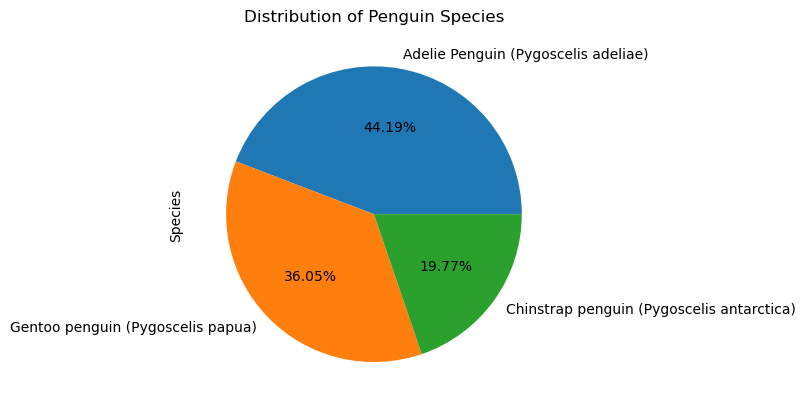

In [55]:
species_counts.plot(kind='pie', autopct="%.2f%%")
plt.title('Distribution of Penguin Species')
plt.show()

# Body Mass vs Flipper Length

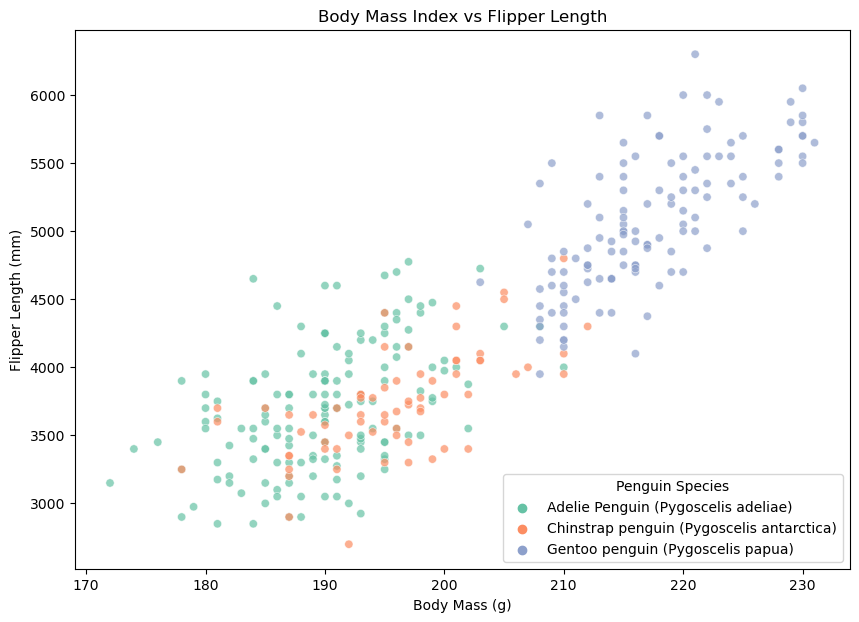

In [56]:
plt.figure(figsize = (10, 7))

sns.scatterplot(
    x=penguin_data['Flipper Length (mm)'],
    y=penguin_data['Body Mass (g)'],
    hue=penguin_data['Species'],
    palette='Set2',  
    alpha=0.7
)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body Mass (g)')
plt.title('Body Mass Index vs Flipper Length')
plt.legend(title='Penguin Species', loc='lower right')
plt.show()

# Delta 15 N and Delta 13 C
- The δ¹⁵N values can provide insights into the penguins' diet and their position in the food chain. Different prey species can have distinct isotopic signatures. Penguins inherit the isotopic values of their prey, and studying δ¹⁵N can help researchers understand their dietary habits and ecological roles.
- For example, higher δ¹⁵N values might suggest a diet consisting of higher trophic level organisms, while lower values might indicate a diet based on lower trophic levels. Analyzing isotopic ratios in tissues like feathers or blood can provide a temporal record of the penguins' diets.
- Delta 13 C refers to the isotopic ratio of carbon isotopes with mass numbers 13 and 12, represented as δ¹³C. The delta notation expresses the relative difference in isotopic composition compared to a reference standard.
- The δ¹³C values are also commonly used in stable isotope analysis and can provide valuable information about the carbon sources in an organism's diet. Different photosynthetic pathways and types of vegetation have distinct carbon isotope signatures, and as animals move up the food chain, they inherit the isotopic values of their food sources.

In [57]:
print(penguin_data.columns.tolist())

['studyName', 'Sample Number', 'Species', 'Island', 'Stage', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments']


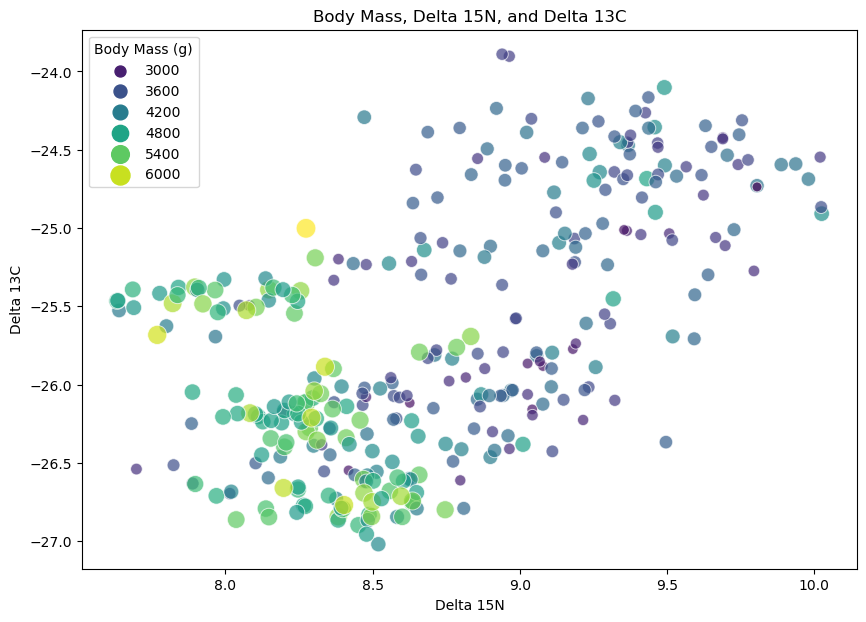

In [58]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=penguin_data['Delta 15 N (o/oo)'],
    y=penguin_data['Delta 13 C (o/oo)'],
    hue=penguin_data['Body Mass (g)'],
    palette='viridis',  
    size=penguin_data['Body Mass (g)'], 
    sizes=(50, 200),  
    alpha=0.7
)
plt.xlabel('Delta 15N')
plt.ylabel('Delta 13C')
plt.title('Body Mass, Delta 15N, and Delta 13C')
plt.legend(title='Body Mass (g)')
plt.show()

# Penguins and Culmen Length 
Culmen length is the measurement of the tip of the beak to the base where it meets the birds head, and this length differs between different penguin species. Culmen length and depth can be correlated with their feeding habits, prey types, and other ecological factors.

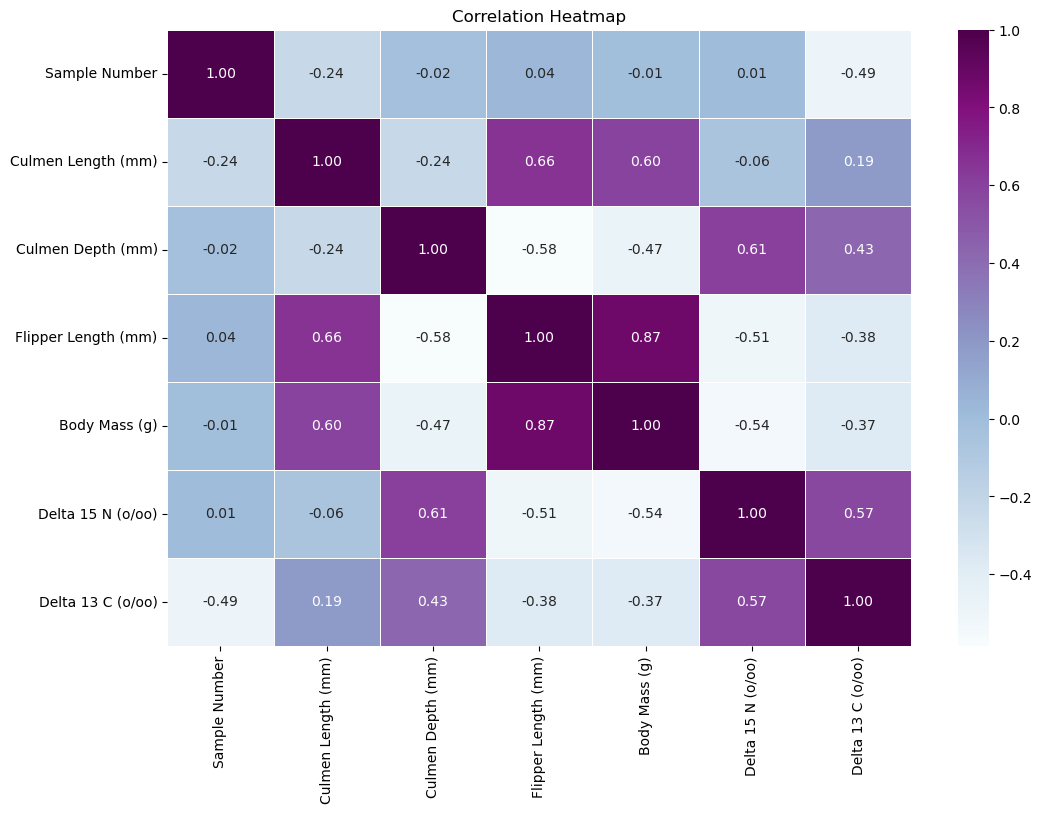

In [59]:
numeric_columns = penguin_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()